<h2><font color="#004D7F" size=6>Módulo 7. Proyectos de Machine Learning</font></h2>



<h1><font color="#004D7F" size=5>1. Proyecto de clasificación multiclase</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Alonso Otiniano Zavala</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [1.2. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Distribución de clase](#section24)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Validación cruzada](#section42)
    * [4.3. Evaluar modelos](#section43)
    * [4.4. Seleccionar el mejor modelo](#section44)
* [5. Fase de Forecasting](#section5)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


El mejor proyecto, de tamaño pequeño, para comenzar con machine learning es el conjunto de datos de [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Este es un buen conjunto de datos para un primer proyecto porque se entiende muy bien. 

Recordemos algunas características principales:
   * Los atributos son numéricos, por lo que debemos averiguar cómo cargar y manejar los datos.
   * Es un problema de clasificación, que nos permite practicar con quizás un tipo más fácil de algoritmo de aprendizaje supervisado.
   * Es un problema de clasificación multiclase (multi-nominal) que puede requerir un manejo especializado.
   * Solo tiene 4 atributos y 150 filas, lo que significa que es pequeño y cabe fácilmente en la memoria principal.
   * Todos los atributos numéricos están en las mismas unidades y la misma escala no requiere ningún escalado especial o transformaciones para comenzar.


<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Primero, importemos todos los módulos, funciones y objetos que vamos a utilizar en este tutorial.

In [62]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

El conjunto de datos de Iris se puede descargar desde el repositorio de UCI Machine Learning.

In [3]:
# Load dataset
filename = 'data/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names=names)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a echar un vistazo a los datos de varias maneras diferentes:
   * Dimensiones del conjunto de datos.
   * Visualización de datos.
   * Resumen estadístico de todos los atributos.
   * Desglosar las instancias en cada clase.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`. 

In [8]:
# shape
dataset.shape

(150, 5)

Puede verse 150 instancias y 5 atributos.

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

También siempre es una buena idea ver como están representados los datos con la función `head()`

In [7]:
# head
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Podemos ver las primeras 5 filas de los datos.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [11]:
# descriptions
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Podemos ver que todos los valores numéricos tienen la misma escala (centímetros) y similar rangos $[0,8]$ centímetros.

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Distribución de clase</font>

Finalmente, veamos ahora la cantidad de instancias (filas) que pertenecen a cada clase. Podemos ver esto como una cuenta absoluta y como un porcentaje con la función `groupby('class').size()`

In [13]:
# class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Podemos ver que cada clase tiene el mismo número de instancias (50 ó el 33% del conjunto de datos).

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Comenzamos con algunas gráficas univariadas, es decir, gráficas de cada variable individual. Es útil con la visualización tener una forma de referirse solo a los atributos de entrada y, por otro lado, solo a los atributos de salida. 

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno

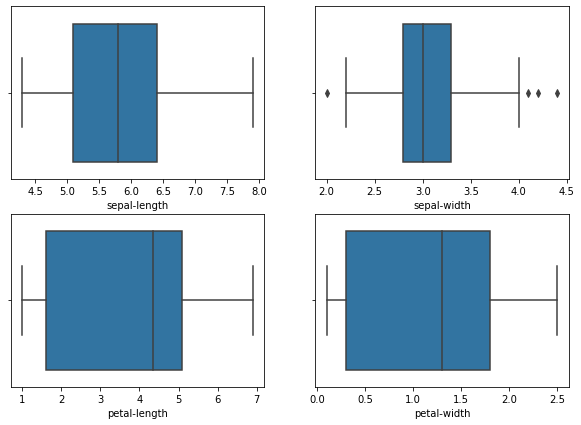

In [34]:
# box and whisker plots 
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.boxplot(dataset["sepal-length"], ax=axes[0, 0])
sns.boxplot(dataset["sepal-width"], ax=axes[0, 1])
sns.boxplot(dataset["petal-length"], ax=axes[1, 0])
sns.boxplot(dataset["petal-width"], ax=axes[1, 1])

/home/manwest/Documentos/Jupyter/enviroment/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


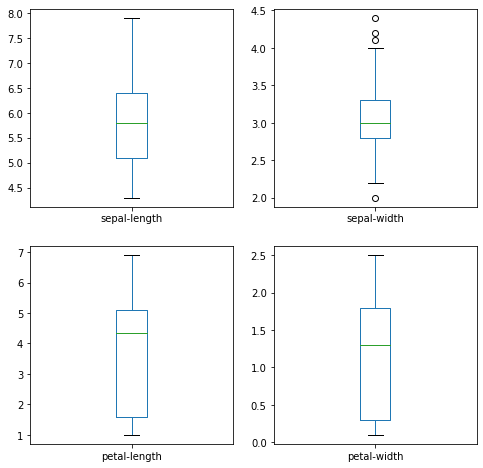

In [47]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.plot(ax=ax, kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución. Parece que quizás dos de las variables de entrada tienen una distribución gaussiana. Es útil tener en cuenta que podemos usar algoritmos que pueden explotar esta suposición.

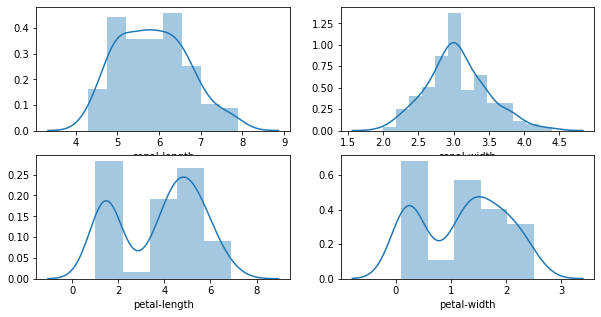

In [44]:
# histograms - Seaborn
f, axes = plt.subplots(2, 2, figsize=(10,5))
sns.distplot(dataset["sepal-length"], ax=axes[0, 0])
sns.distplot(dataset["sepal-width"], ax=axes[0, 1])
sns.distplot(dataset["petal-length"], ax=axes[1, 0])
sns.distplot(dataset["petal-width"], ax=axes[1, 1])

/home/manwest/Documentos/Jupyter/enviroment/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


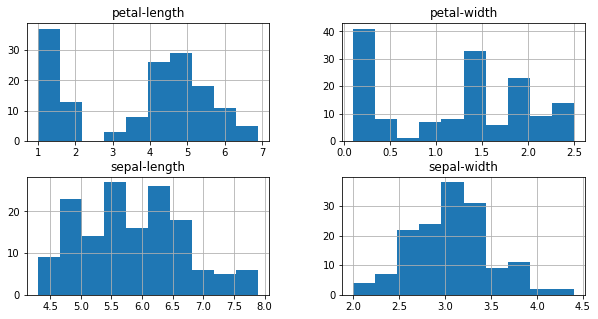

In [41]:
# histograms - Matplotlib
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables. 

<a id="section321"></a>
### <font color="#004D7F"> Diagramas de dispersión</font>
Primero veamos los diagramas de dispersión de todos los pares de atributos y coloreamos los puntos por clase. Además, como los gráficos de dispersión muestran que los puntos para cada clase generalmente están separados, podemos dibujar puntos suspensivos alrededor de ellos.

Ahora podemos ver las interacciones entre las variables. Veamos gráficos de dispersión de todos los pares de atributos. Esto puede ser útil para detectar relaciones estructuradas entre variables de entrada.
Tenga en cuenta la agrupación diagonal de algunos pares de atributos. Esto sugiere una alta correlación y una relación predecible.

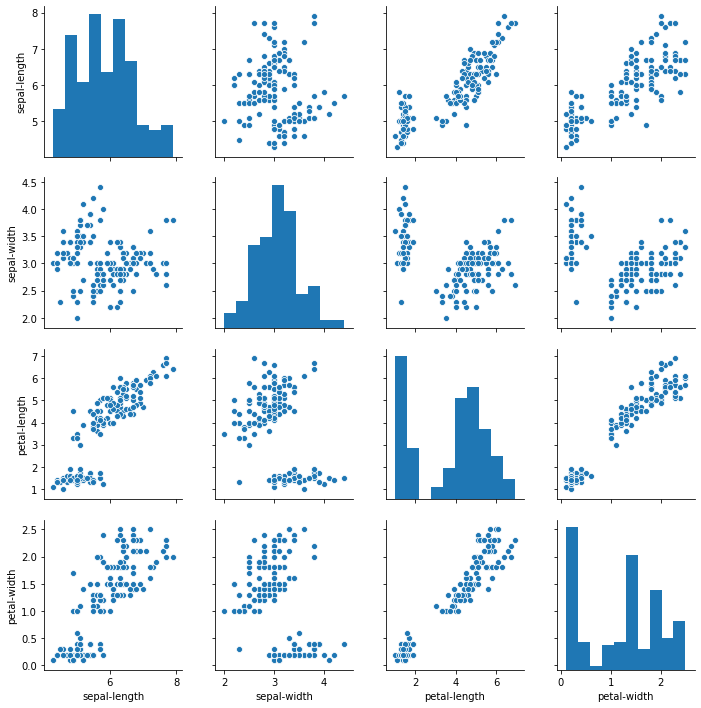

In [58]:
# scatter plot matrix - Seaborn
sns.pairplot(dataset);

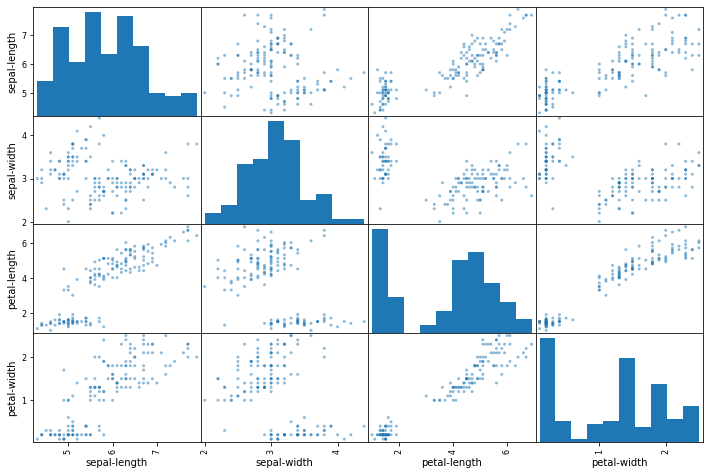

In [56]:
# scatter plot matrix - Matplotlib
plt.rcParams["figure.figsize"] = [12,8]
pd.plotting.scatter_matrix(dataset)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Configurar una validación cruzada de 10-fold.
* Construir 5 modelos diferentes y evaluar el rendimiento de cada uno de ellos en este conjunto de datos.
* Seleccionar el mejor modelo.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Necesitamos saber si el modelo que vayamos a crear será bueno. Más adelante, usaremos métodos estadísticos para estimar el Accuracy de los modelos que creamos en datos no etiquetados. También queremos una estimación más concreta del Accuracy del mejor modelo en datos no etiquetados mediante su evaluación en datos reales invisibles. Es decir, vamos a retener algunos datos que los algoritmos no podrán ver y usaremos estos datos para obtener una segunda idea independiente de qué tan exacto podría ser el mejor modelo. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [59]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Validación cruzada</font>

Utilizaremos la validación cruzada 10 veces para estimar el Accuracy. Esto dividirá nuestro conjunto de datos en 10 partes, entrenará en 9 y probará en 1 y repetirá para todas las combinaciones de divisiones de train/test. Estamos utilizando la métrica de Accuracy para evaluar modelos. Esta es una proporción del número de instancias correctamente predichas dividido por el número total de instancias en el conjunto de datos multiplicado por 100 para dar un porcentaje (por ejemplo, 95% de Accuracy).

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos</font>

No sabemos qué algoritmos serían buenos para este problema ni qué configuraciones utilizar. A partir de los gráficos, obtenemos una idea de que algunas de las clases son parcialmente separables linealmente en algunas dimensiones, por lo que en general esperamos buenos resultados. Vamos a evaluar 6 algoritmos diferentes:
* Logistic Regression (LoR)
* Linear Discriminant Analysis (LDA).
* Classification and Regression Trees (CART).
* $k$-Nearest Neighbors ($k$-NN).
* Support Vector Machines (SVM).
* Gaussian Navie Bayes (NB).

Esta es una buena mezcla de métodos lineales simples (LoR, LDA), no lineales (CART, $k$-NN, SVM, NB). Reajustamos el número aleatorio de \textit{seed} antes de cada ejecución para asegurarnos de que la evaluación de cada algoritmo se realice utilizando exactamente las mismas divisiones de datos. Asegura que los resultados son directamente comparables.

In [81]:
# Spot-Check Algorithms
models = []
models.append(('LoR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
seed=3
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR: 98.33% (3.33%)
LDA: 97.50% (3.82%)
k-NN: 98.33% (3.33%)
CART: 96.67% (4.08%)
NB: 97.50% (5.34%)
SVM: 98.33% (3.33%)


<a id="section44"></a>
## <font color="#004D7F"> 4.4. Seleccionar el mejor modelo</font>

Ahora tenemos 6 modelos y estimaciones de Accruacy para cada uno de ellos. Necesitamos comparar los modelos entre sí y seleccionar los más precisos. Podemos informar sobre el Accuracy de cada modelo creando primero una lista de los modelos, reuniendo estadísticas de remuestreo y utilizando la función de resumen en el resultado.

Podemos ver que LoR, $k$-NN y SVM tienen el mejor Accuracy. También podemos crear una gráfica de los resultados de la evaluación del modelo y comparar la dispersión y el Accuracy medio de cada modelo. Hay una población de medidas de Accuracy para cada algoritmo porque cada algoritmo se evaluó 10 veces (validación cruzada 10 veces).

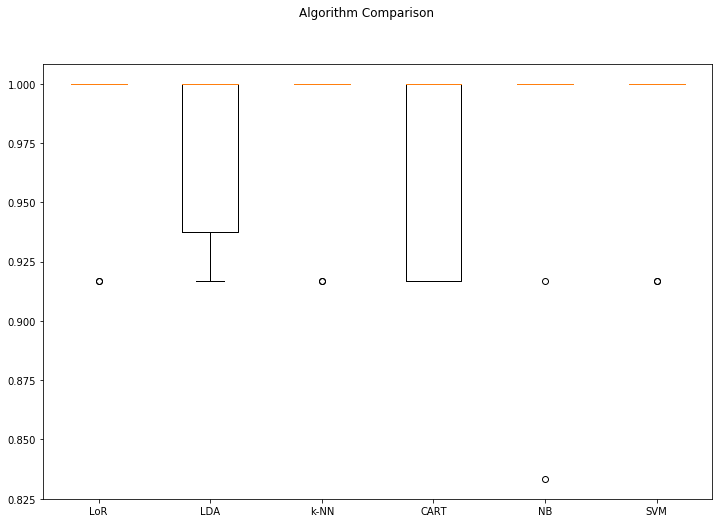

In [82]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Forecasting</font>

Vamos a seleccionar el algoritmo $k$-NN como el modelo más preciso. Ahora queremos tener una idea del Accuracy del modelo en nuestro conjunto de validación. Esto nos dará una verificación final independiente sobre el Accuracy del mejor modelo. Es valioso mantener un conjunto de validación en caso de que haya cometido un error durante el entrenamiento, como el ajuste excesivo del conjunto de entrenamiento o una fuga de datos. Ambos darán como resultado un resultado demasiado optimista. Podemos ejecutar el modelo $k$-NN directamente en el conjunto de validación y resumir los resultados en una matriz de confusión

In [83]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>